#prepare a model for prediction of prostate cancer using KNN Classifier 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("prostate.csv")
df

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1.321756,7,60,4.385147,1
93,3.821004,3.896909,44,-1.386294,2.169054,7,40,4.684443,1
94,2.907447,3.396185,52,-1.386294,2.463853,7,10,5.143124,1
95,2.882564,3.773910,68,1.558145,1.558145,7,80,5.477509,1


In [5]:
x = df.drop("Target",axis = 1)
y = df["Target"]

In [6]:
#Feature scaling
scaler = StandardScaler()

In [7]:
df1 = pd.DataFrame(scaler.fit_transform(x),columns = df.columns[:-1])
df1.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.867655,-1.047571,-0.868957,-1.834631


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 1)

In [9]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
y_pred = knn_model.predict(x_test)

In [11]:
print(confusion_matrix(y_test,y_pred))

[[18  4]
 [ 6  2]]


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.33      0.25      0.29         8

    accuracy                           0.67        30
   macro avg       0.54      0.53      0.53        30
weighted avg       0.64      0.67      0.65        30



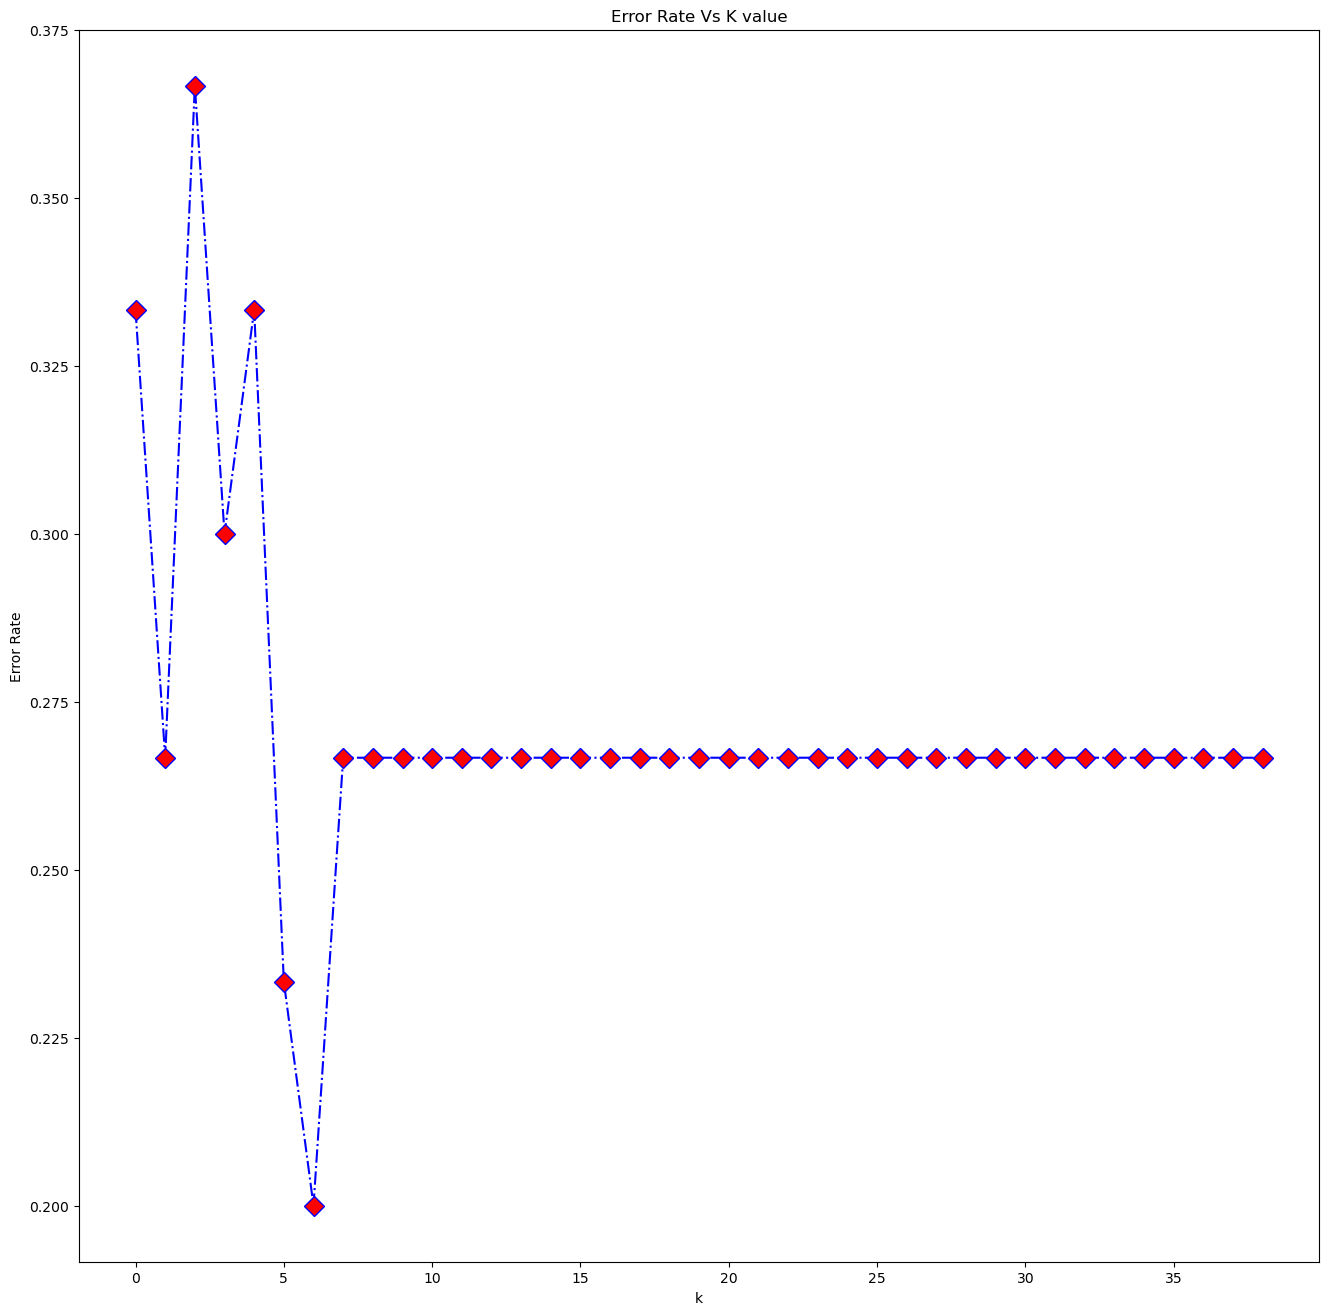

In [64]:
#Elbow method for calculating k
error_rate  = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    new_y_pred = knn.predict(x_test)
    # print(new_y_pred)
    error_rate.append(np.mean(new_y_pred != y_test))

plt.figure(figsize = (16,16))
plt.plot(error_rate,color = "b",linestyle = "dashdot" , marker = "D" , markerfacecolor = "r",markersize = 10)
plt.title("Error Rate Vs K value")
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

k is the least point in the graph
k is 6 here

we combine ml algo for better 
it means a collection of things and in ml terminology it refers to the approach of combining multiple ml model to produce a more accurate prediction
it implements an ensemble of fast algo such as decision tree's
why.... ensemble learing 
a basic idea behind the ensemble learning is to lebrirage the courd by aggregate the prediction of model's
it is divide into two main categories
*   bagging this works in parallel (random forest)
*   boosting works sequentially (adaboost , XG boost) 

-------------
                                         DataSet
                         |------------------|----------------|            
                     classifier1       classifier2       classifierN
                           \               |                 /
                            \              |                /
                             \             |               /
                              \            |              /
                               \           |             /
                                --------------------------
                                           |   
                                           |
                                final classification Result


random forest is an ensemble learing aslo which follow  bagging ensemble technique

-----------------
BAGGING : it is a ML ensemble model algo design to improve the stability and accuracy of ML algo
* it is a homogenous weak learners model that learns from each other independently in parallel and combines them for determining the model it also know as Bootsraping Aggregation

-----------
Random Forest : in a extension of bagging technique where each classifier in the ensemble is a decision tree classifier and is generated wing random 
selection of attribute at each mode to determine the split.
* during classification each tree votes and the most popular cls is returned


Implementation steps for Random Forest:
* multiple subset are created from the original dataset, selecting the observations with replacement
* a subset of feature is randomly selected and which ever give the best split is used to split the node
* decision trees from each sub set are grown to the fullest
* repeat the above steps for other subset and prediction is given based on aggregation of prediction from n number of trees
  


------------------



## Boosting (Sequential)
* it is Techique desig
* firstly a model is built from **training data**
* Then the second modelis built which tries to correct the error present in the first model
* this is continued and model are added until the complete training dataset is predected correctly

### Difference
   **Boosting**                Vs                    **Bagging**
* combine prediction that belong to diff types    * it is a method of combining some type of prediction
* main aim of boosting is to decrese bias , not variance   * main aim of bagging is to decrease variance not bias
* at every successive layer, model are weighted according to there performance  * all model have the same weighteage